In [ ]:
import tensorflow as tf

with tf.name_scope('input') as scope:
    a = tf.Variable(2000,name='a')
    b = tf.Variable(17,name='b')

with tf.name_scope('operation') as scope:
    add = tf.add(a,b,name='add')
    sub = tf.sub(a,b,name='sub')
    mul = tf.mul(a,b,name='mul')
    div = tf.div(a,b,name='div')

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter(
        './logs/Do_tensorboard', sess.graph)
    print(sess.run(add))
    print(sess.run(sub))
    print(sess.run(mul))
    print(sess.run(div))


In [ ]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

filename = "cat.jpg"
image = mpimg.imread(filename)
print(image.shape) 

x = tf.Variable(image, name='x')
init = tf.global_variables_initializer()

with tf.Session() as sess:
    x = tf.transpose(x, perm=[1, 0, 2])
    sess.run(init)
    result = sess.run(x)
print(result.shape)
plt.imshow(result)
plt.show()


(832, 1204, 3)


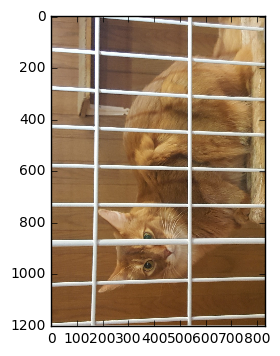

In [1]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

with tf.name_scope('Image') as scope:
    filename = "cat.jpg"
    image = mpimg.imread(filename)
    image_shaped_input = tf.reshape(image,[-1,832,1204,3])
    input_sum = tf.summary.image('input',image_shaped_input,3)
    print(image.shape) 
    x = tf.Variable(image, name='x')
    transpose_x = tf.transpose(x, perm=[1, 0, 2], name='transpose')
    transpose_img = tf.reshape(transpose_x,[-1,1204,832,3])
    output_sum = tf.summary.image('output',transpose_img, 3)
    
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/Do_plt", sess.graph)
    summary = sess.run(merged)
    writer.add_summary(summary)
    result = sess.run(transpose_x)

plt.imshow(result)
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np

with tf.name_scope('init') as scope:
    seed = np.random.seed()
    x = tf.random_uniform([5],minval=0.0,maxval=10.0,
                         dtype=tf.float32, seed=seed)
    x_sum = tf.summary.histogram('x', x)
with tf.name_scope('mean') as scope:
    mean = tf.reduce_mean(x)
    mean_sum = tf.summary.scalar('mean', mean)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter('./logs/example', sess.graph)
    sess.run(init)
    for i in range(5):
        sess.run(x)
        sess.run(mean)
        summary = sess.run(merged)
        writer.add_summary(summary, i)
        print('X: ', sess.run(x),
              'MEAN: ', sess.run(mean))
